**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Conv1D, Dense, Flatten, MaxPooling1D, Bidirectional, GRU, LSTM
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

**Import Dataset**

In [ ]:
# Load the dataset
stock = pd.read_csv('/content/CIPLA.csv')

**Data Preprocessing**

In [ ]:
stock = stock.drop(['Symbol', 'Series', 'Prev Close', 'VWAP', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis=1)

In [ ]:
# Data preprocessing
window_size = 50
X = []
Y = []

for i in range(len(stock) - window_size - 1):
    first = stock.iloc[i, 5]
    temp = [(stock.iloc[i + j, 5] - first) / first for j in range(window_size)]
    temp2 = [(stock.iloc[i + window_size, 5] - first) / first]
    X.append(temp)
    Y.append(temp2)

**Train-test split**

In [ ]:
# Train-test split
train_X, test_X, train_label, test_label = train_test_split(X, Y, test_size=0.2, shuffle=False)
len_t = len(train_X)

**Convert to numpy arrays**

In [ ]:
# Convert to numpy arrays
train_X = np.array(train_X).reshape(len(train_X), 50, 1)
test_X = np.array(test_X).reshape(len(test_X), 50, 1)
train_label = np.array(train_label)
test_label = np.array(test_label)

**Model Building**

In [ ]:
from keras.layers import Dropout
# Model building
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 bidirectional (Bidirection  (None, 24, 100)           34800     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 24, 100)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               6

**Compile the model**

In [ ]:
# Compile the model
model.compile(optimizer='RMSprop', loss='mse')

**Model Training and Evaluation**

In [ ]:
# Model training
history = model.fit(train_X, train_label, validation_data=(test_X, test_label), epochs=20, batch_size=64, shuffle=False)

# Model evaluation
loss = model.evaluate(test_X, test_label)
print("Test Loss:", loss)

Epoch 1/20
75/75 [==============================] - 9s 55ms/step - loss: 0.0103 - val_loss: 0.0029
Epoch 2/20
75/75 [==============================] - 3s 38ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 3/20
75/75 [==============================] - 4s 50ms/step - loss: 0.0044 - val_loss: 0.0016
Epoch 4/20
75/75 [==============================] - 3s 45ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 5/20
75/75 [==============================] - 3s 37ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 6/20
75/75 [==============================] - 3s 37ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 7/20
75/75 [==============================] - 3s 42ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 8/20
75/75 [==============================] - 3s 39ms/step - loss: 0.0029 - val_loss: 0.0010
Epoch 9/20
75/75 [==============================] - 3s 38ms/step - loss: 0.0028 - val_loss: 9.8433e-04
Epoch 10/20
75/75 [==============================] - 3s 38ms/step - loss: 0.0028 - val_loss: 9.4218e-04
E

**Predicting**

In [ ]:
# Plotting
predicted = model.predict(test_X)
predicted = np.array(predicted[:, 0]).reshape(-1, 1)
test_label = np.array(test_label[:, 0]).reshape(-1, 1)

for j in range(len_t, len_t + len(test_X)):
    temp = stock.iloc[j, 4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

38/38 [==============================] - 1s 7ms/step


**Plotting**

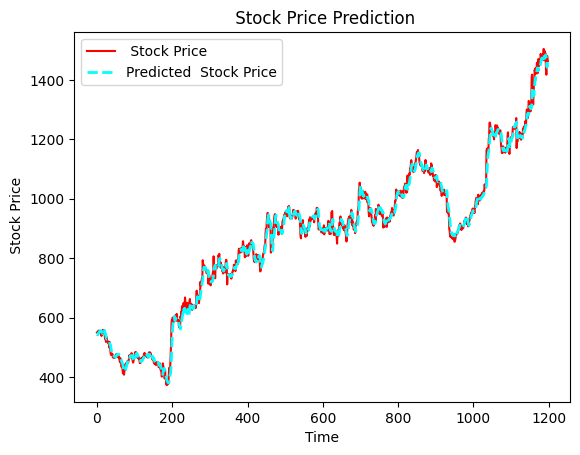

In [ ]:
plt.plot(test_label, color = 'red', label = ' Stock Price')
plt.plot(predicted, color = 'cyan', label = 'Predicted  Stock Price', linestyle='dashed', linewidth=2)
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

**Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(test_label, predicted)
print("Mean Squared Error (MSE):", mse)
# Calculate MAE
mae = mean_absolute_error(test_label, predicted)
print("Mean Absolute Error (MAE):", mae)
# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Calculate MAPE
mape = mean_absolute_percentage_error(test_label, predicted)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 11116.650179741016
Mean Absolute Error (MAE): 81.29961772523949
Root Mean Squared Error (RMSE): 105.4355261747245
Mean Absolute Percentage Error (MAPE): 9.528291162838439
